# Exercise 9.1
### Energy plot:
The image is quite cluttered, with a bar chart placed on top of a line chart. The large icons on the lines cover the plotted data, making it difficult to read. These icons should be removed, as they obscure important visual information.

Additionally, having both a bar chart and a line chart display essentially the same data is redundant. If the relationship between the three energy sources is important, it would be better to move the bar chart into a separate pie chart or, preferably, into a clean, standalone bar chart. Otherwise, I would consider removing it entirely.

This would enhance readability and follow Tufte’s principles by reducing chartjunk and increasing the data-ink ratio.

### Machinle learning plot:
We see multiple bars placed side by side for each year, representing different application domains: SCM, MM, PPC, and QM. This approach introduces visual clutter and makes it difficult to track overall trends in publication volume over time. To improve clarity and adhere to Tufte’s principles—especially minimalism and maximizing the data-ink ratio.

I would consolidate the four separate bars into a single stacked bar for each year. Each segment of the bar would represent one domain, distinguished by color. This would reduce redundant elements, eliminate chartjunk, and allow viewers to see both the total number of publications and the relative contribution of each domain more effectively.

By simplifying the visual structure, the chart would communicate more with less—highlighting trends without overwhelming the viewer.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import foldnorm_gen

ImportError: cannot import name 'foldnorm_gen' from 'scipy.stats' (C:\Users\dadoi\.conda\envs\workspace\Lib\site-packages\scipy\stats\__init__.py)

In [3]:
data = np.load('smokers.npz')
data = pd.DataFrame(data['data'])
data.columns= ['country', 'smoker', 'age']
data

,country,smoker,age
0,19,0,87
1,8,0,77
2,8,0,66
3,12,0,69
4,4,0,57
...,...,...,...
19995,9,0,68
19996,7,0,85
19997,14,0,54
19998,2,0,77


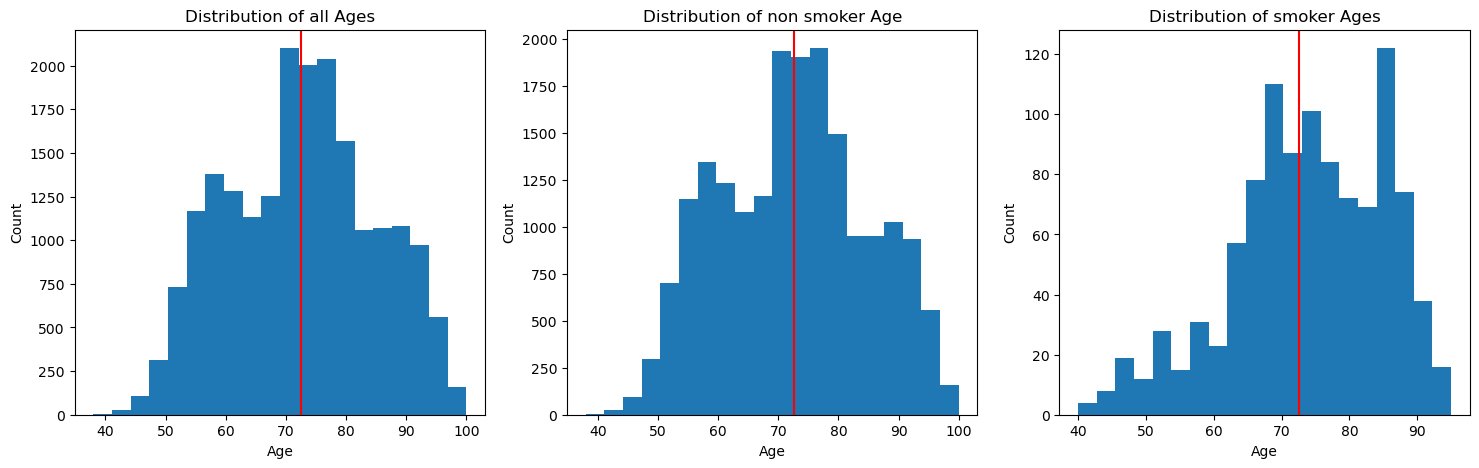

In [24]:
ax,fig = plt.subplots(1,3, figsize = (18,5))


fig[0].hist(data['age'], bins=20)
fig[0].title.set_text('Distribution of all Ages')
fig[0].set_xlabel('Age')
fig[0].set_ylabel('Count')
fig[0].axvline(x=data['age'].mean(), color='r')



fig[1].hist(data[data['smoker'] == 0]['age'], bins=20)
fig[1].title.set_text('Distribution of non smoker Age')
fig[1].set_xlabel('Age')
fig[1].set_ylabel('Count')
fig[1].axvline(x=data['age'].mean(), color='r')


fig[2].hist(data[data['smoker'] == 1]['age'], bins=20)
fig[2].title.set_text('Distribution of smoker Ages')
fig[2].set_xlabel('Age')
fig[2].set_ylabel('Count')
fig[2].axvline(x=data['age'].mean(), color='r')


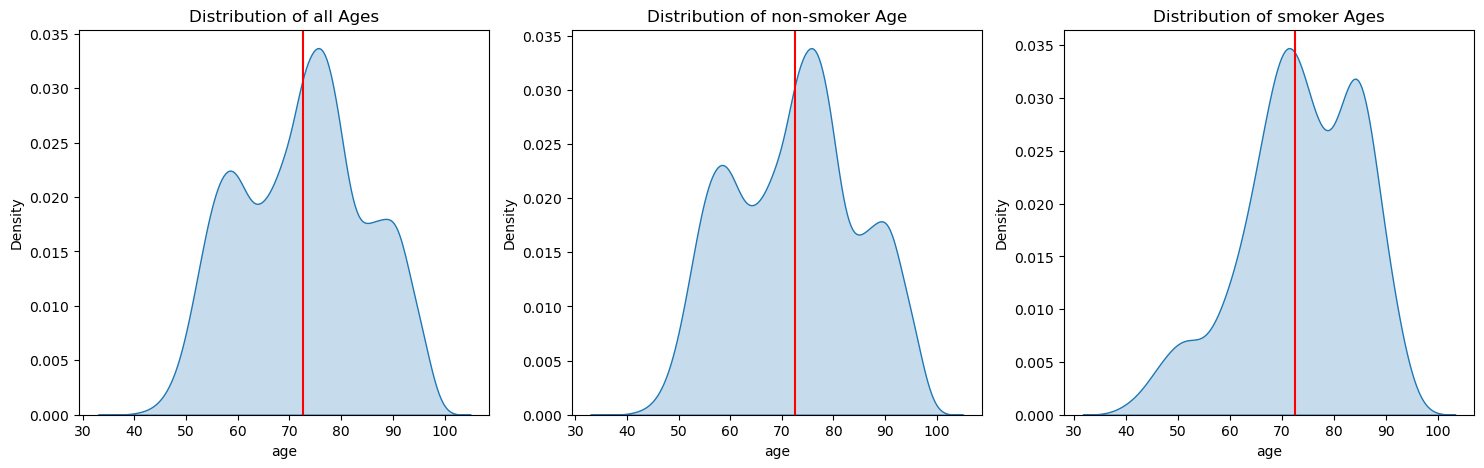

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))  # Corrected: fig, ax

# All ages
sns.kdeplot(data['age'], ax=ax[0], fill=True)
ax[0].set_title('Distribution of all Ages')
ax[0].axvline(data['age'].mean(), color='r')

# Non-smokers
sns.kdeplot(data[data['smoker'] == 0]['age'], ax=ax[1], fill=True)
ax[1].set_title('Distribution of non-smoker Age')
ax[1].axvline(data['age'].mean(), color='r')

# Smokers
sns.kdeplot(data[data['smoker'] == 1]['age'], ax=ax[2], fill=True)
ax[2].set_title('Distribution of smoker Ages')
ax[2].axvline(data['age'].mean(), color='r')

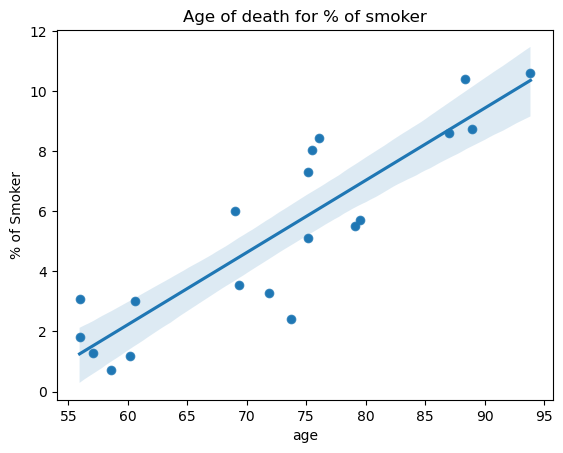

In [47]:
grouped =data.groupby('country').agg({'age':'mean', 'smoker': lambda x : sum(x)/len(x)*100})

sns.scatterplot(x='age' ,y='smoker', data=grouped)
sns.regplot(x='age' ,y='smoker', data=grouped, fit_reg=True)
plt.ylabel('% of Smoker')
plt.title('Age of death for % of smoker')
plt.show()

